# 计算建模实验二


In [17]:
import numpy as np
import matplotlib.pylab as plt
import cv2 as cv
import random
from scipy.optimize import least_squares
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

## 直线拟合

### 生成待拟合点
采用直线方程加噪声的方法生成

In [4]:
a=1
b=1
x=np.arange(0,100,0.1)
y_true=a*x+b
y_noise=y_true+np.random.normal(0,1,x.shape)

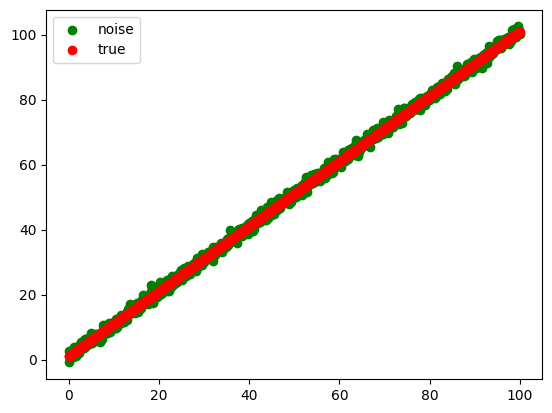

In [13]:
plt.figure()
plt.scatter(x,y_noise,label='noise',c='g')
plt.scatter(x,y_true,label='true',c='r')

plt.legend()
plt.show()


0.9998551665726304 0.9918972181209587


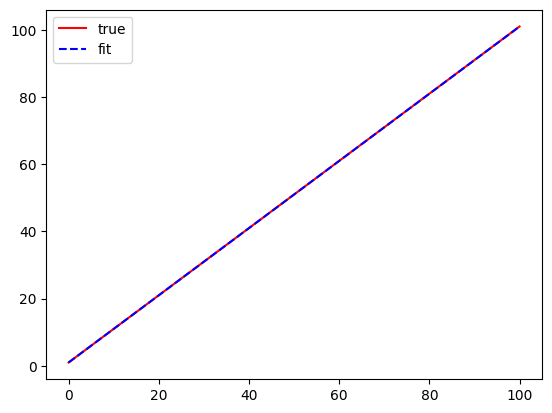

In [8]:
#最小二乘
A=np.vstack([x,np.ones(len(x))]).T
a_,b_=np.linalg.lstsq(A,y_noise,rcond=None)[0]
print(a_,b_)
plt.figure()
plt.plot([0,100],[1,101],'r-',label='true')
plt.plot([0,100],[0*a_+b_,100*a_+b_],'b--',label='fit')
plt.legend()
plt.show()





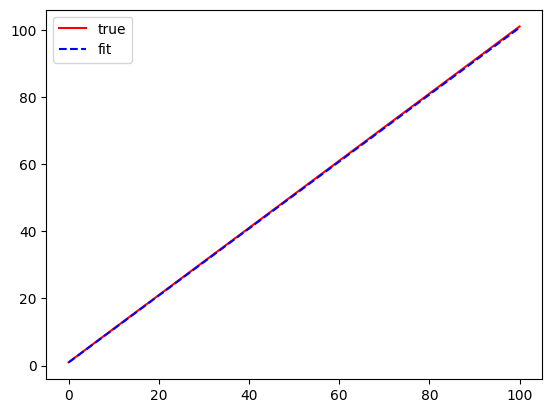

In [15]:
#RANSAC
X = x[:, np.newaxis]

ransac = RANSACRegressor(min_samples=2, residual_threshold=0.1,
                             max_trials=100, random_state=None)
ransac.fit(X, y_noise)
# 获取拟合直线的斜率和截距
a_ = ransac.estimator_.coef_[0]
b_ = ransac.estimator_.intercept_
plt.figure()
plt.plot([0,100],[1,101],'r-',label='true')
plt.plot([0,100],[0*a_+b_,100*a_+b_],'b--',label='fit')
plt.legend()
plt.show()



In [19]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

def fit_multiple_lines_ransac(x, y, num_lines, threshold=0.1, max_iterations=100):
    """
    使用RANSAC算法同时拟合多条直线

    参数:
    x: 输入的x坐标值列表
    y: 对应的y坐标值列表
    num_lines: 拟合的直线数量
    threshold: RANSAC算法的阈值，用于判断一个点是否属于拟合直线，默认为0.1
    max_iterations: RANSAC算法的最大迭代次数，默认为100

    返回值:
    slopes: 直线斜率列表
    intercepts: 直线截距列表
    """

    # 将x和y转换为NumPy数组
    x = np.array(x)
    y = np.array(y)

    # 将x转换为二维数组
    X = x[:, np.newaxis]

    slopes = []
    intercepts = []

    for i in range(num_lines):
        # 使用RANSAC算法拟合直线参数
        ransac = RANSACRegressor( min_samples=2, residual_threshold=threshold,
                                 max_trials=max_iterations, random_state=None)
        ransac.fit(X, y)

        # 获取拟合直线的斜率和截距
        slope = ransac.estimator_.coef_[0]
        intercept = ransac.estimator_.intercept_

        slopes.append(slope)
        intercepts.append(intercept)

        # 剔除已拟合的直线上的数据点
        inlier_mask = ransac.inlier_mask_
        X = X[~inlier_mask]
        y = y[~inlier_mask]

    return slopes, intercepts

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [2, 4, 6, 8, 10, 12, 14, 16]

num_lines = 2

slopes, intercepts = fit_multiple_lines_ransac(x, y, num_lines)
print("拟合直线参数：")
for i in range(num_lines):
    slope = slopes[i]
    intercept = intercepts[i]
    print(f"直线{i + 1}：斜率={slope}，截距={intercept}")


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by RANSACRegressor.

## 拟合椭圆方程